In [1]:
!pip install statsmodels pmdarima prophet scikit-learn

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/719.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.3 kB ? eta -:--:--
   ----------------------------- ---------- 524.3/719.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 719.3/719.3 kB 2.0 MB/s  0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/12.1 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/12.1 MB 1.7 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.1 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.1 MB 2.2 MB/s eta 0:00:05
   ------------ --------------------------- 3.9/12.1 MB 2.6 MB/s eta 0:00:04
   -------------- -----

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL

DATA_PATH = "../data/processed/airquality_cleaned.parquet"
df = pd.read_parquet(DATA_PATH)
df.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temp,Humidity,Absolute_Humidity
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO_GT              9357 non-null   float64
 1   PT08_S1_CO         8991 non-null   float64
 2   NMHC_GT            914 non-null    float64
 3   C6H6_GT            9357 non-null   float64
 4   PT08_S2_NMHC       8991 non-null   float64
 5   NOx_GT             7718 non-null   float64
 6   PT08_S3_NOx        8991 non-null   float64
 7   NO2_GT             7715 non-null   float64
 8   PT08_S4_NO2        8991 non-null   float64
 9   PT08_S5_O3         8991 non-null   float64
 10  Temp               9357 non-null   float64
 11  Humidity           9357 non-null   float64
 12  Absolute_Humidity  9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [7]:
df.index.min(), df.index.max()

(Timestamp('2004-03-10 18:00:00'), Timestamp('2005-04-04 14:00:00'))

In [8]:
ts = df['CO_GT'].dropna()
ts.head()

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
Name: CO_GT, dtype: float64

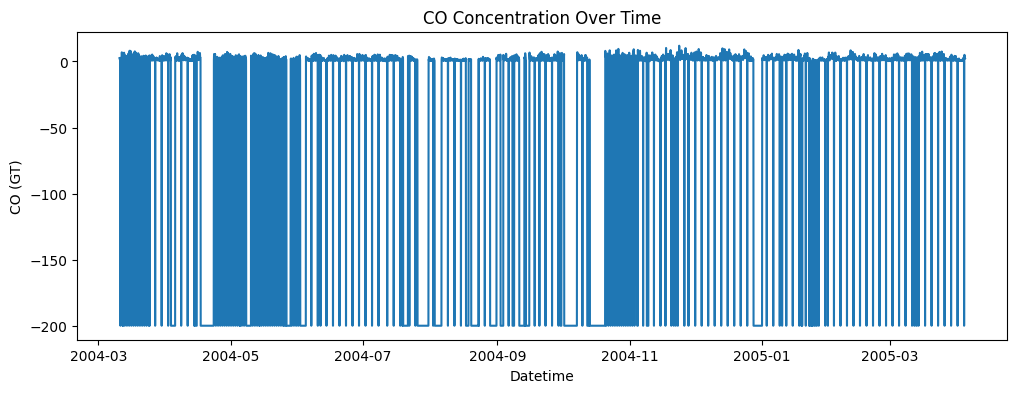

In [9]:
plt.figure(figsize=(12,4))
plt.plot(ts)
plt.title("CO Concentration Over Time")
plt.xlabel("Datetime")
plt.ylabel("CO (GT)")
plt.show()

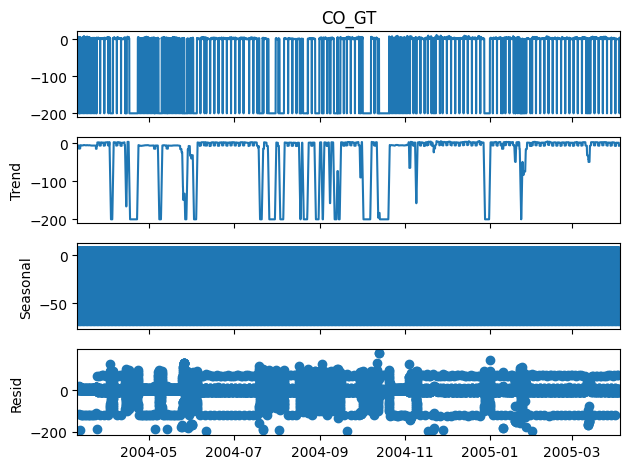

In [10]:
decomp = seasonal_decompose(ts, model='additive', period=24)
decomp.plot()
plt.show()

Trend --> long-term air quality change

Seasonality --> daily traffic pattern

Residual --> irregular spikes (potential anomalies)

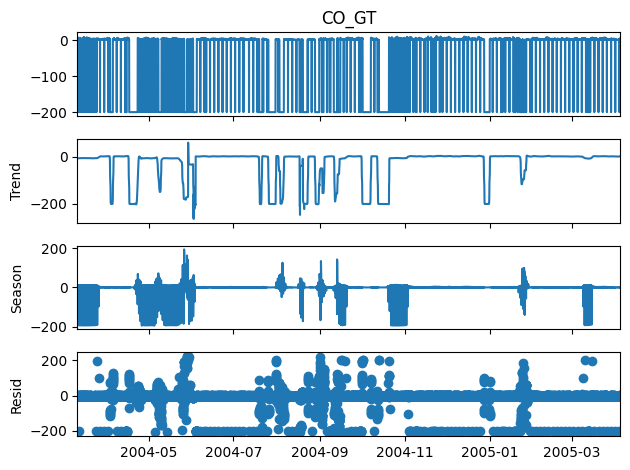

In [11]:
stl = STL(ts, period=24, robust=True)
stl_result = stl.fit()
stl_result.plot()
plt.show()

STL decomposition isolates anomalies more clearly in residuals compared to classical decomposition.

In [12]:
df['CO_STL_Residual'] = stl_result.resid
df.to_parquet("../data/processed/airquality_with_stl.parquet")